<a href="https://colab.research.google.com/github/Steve-siddu/Machine-Learning/blob/main/EDA_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

1. Find and predict the survivors percentage with logistic regression after each type of EDA.

EDA's
1. Replacing Age with the median of each Pclass = ?
2. Replacing Age from Pclass and Sex features = ?
3. Replacing Age from Pclass, Sex and Parch features = ?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load Data



In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/titanic_train.csv')

## 2. General Information


### 2.1. Shape

In [ ]:
train.shape

(891, 12)

### 2.2. Features

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 2.3. Head

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4. General Statistics (Describe)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Data Pre-Processing

### 3.1. missing Values

In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


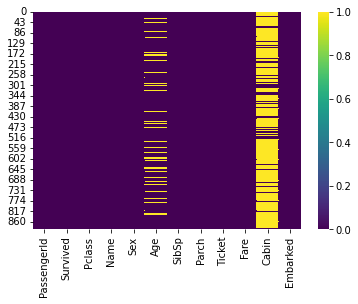

In [ ]:
sns.heatmap(train.isnull(), cmap='viridis')

In [ ]:
# number of missing values in Cabin column
for col in train:
  col_na = train[col].isna().sum()
  print(col_na)
  print(f"percentage of missing values in {col}: ",(col_na*100)/train.shape[0])


0
percentage of missing values in PassengerId:  0.0
0
percentage of missing values in Survived:  0.0
0
percentage of missing values in Pclass:  0.0
0
percentage of missing values in Name:  0.0
0
percentage of missing values in Sex:  0.0
177
percentage of missing values in Age:  19.865319865319865
0
percentage of missing values in SibSp:  0.0
0
percentage of missing values in Parch:  0.0
0
percentage of missing values in Ticket:  0.0
0
percentage of missing values in Fare:  0.0
687
percentage of missing values in Cabin:  77.10437710437711
2
percentage of missing values in Embarked:  0.2244668911335578


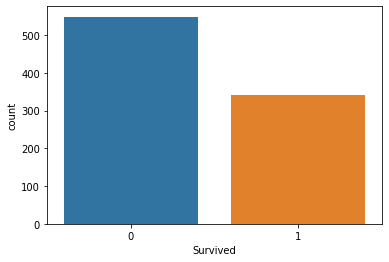

In [ ]:
# sns.histplot(train, x='Survived', bins=3)
sns.countplot(data=train, x='Survived')

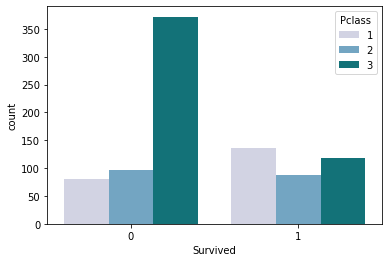

In [ ]:
sns.countplot(data=train, x='Survived', hue='Pclass', palette='PuBuGn')

3.1.1. Replacing missing values of age with median of eah class Age

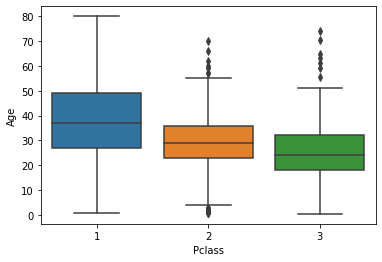

In [ ]:
sns.boxplot(data=train, x='Pclass', y='Age')

Observation:

1. Median age of passengers in Pclass='1' is 37
2. Median age of passengers in Pclass='2' is 28
3. Median age of passengers in Pclass='2' is 25

3.1.2. Replacing missing values of age By generating values from Sex and Pclass column



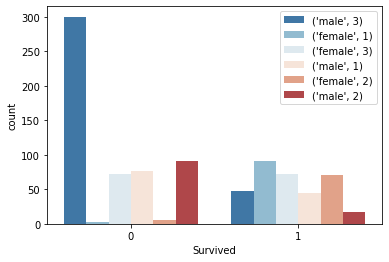

In [ ]:
sns.countplot(data=train, x='Survived', hue=train[['Sex', 'Pclass']].apply(tuple, axis=1), palette='RdBu_r')

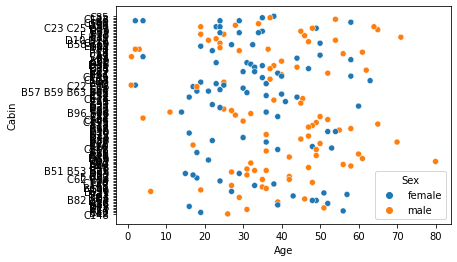

In [ ]:
sns.scatterplot(data=train.dropna(), x='Age' , y='Cabin', hue='Sex')

In [ ]:
train.shape

(891, 12)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

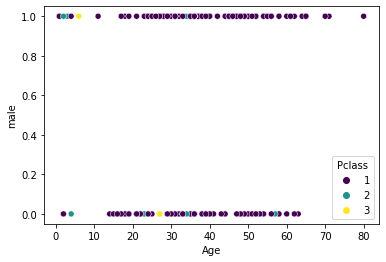

In [ ]:
sns.scatterplot(data=train.dropna(), x='Age', y='male', hue='Pclass', palette='viridis')

EDA on Pclass_1

In [13]:
print(train[train['Pclass']==1]['Age'].shape)
print(train[:][train['Pclass']==1]['Age'].shape)
print(train.loc[train['Pclass']==1, 'Age'].shape)

(216,)
(216,)
(216,)


In [9]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# consider the data of Pclass=1
pclass_1 = train[:][train['Pclass']==1]

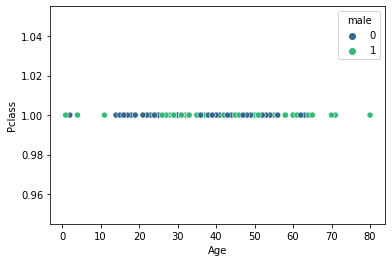

In [ ]:
sns.scatterplot(data=pclass_1.dropna(), x='Age', y='Pclass', hue='male', palette='viridis')

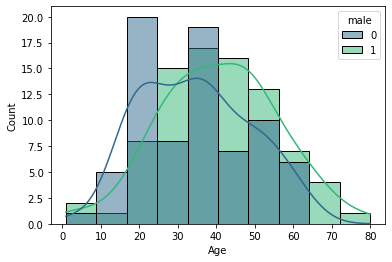

In [ ]:
sns.histplot(data=pclass_1.dropna(), x='Age', hue='male', palette='viridis', kde=True)

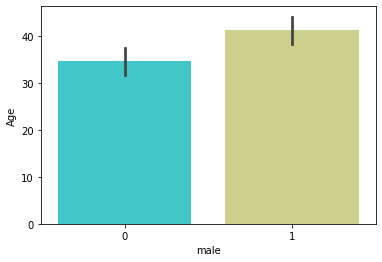

In [ ]:
sns.barplot(data=pclass_1, x='male', y='Age', palette='rainbow')

In [ ]:
pclass_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.564815,0.009259,0.587963
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.496933,0.096001,0.493345
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950,0.000000,0.000000,0.000000
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500,1.000000,0.000000,1.000000
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000,1.000000,0.000000,1.000000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
pclass_1[:][pclass_1['male']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,122.000000,122.000000,122.0,101.000000,122.000000,122.000000,122.000000,122.0,122.000000,122.000000
mean,455.729508,0.368852,1.0,41.281386,0.311475,0.278689,67.226127,1.0,0.008197,0.647541
std,247.026449,0.484484,0.0,15.139570,0.546695,0.658853,77.548021,0.0,0.090536,0.479706
min,7.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,255.500000,0.000000,1.0,30.000000,0.000000,0.000000,27.728100,1.0,0.000000,0.000000
50%,480.500000,0.000000,1.0,40.000000,0.000000,0.000000,41.262500,1.0,0.000000,1.000000
75%,660.750000,1.000000,1.0,51.000000,1.000000,0.000000,78.459375,1.0,0.000000,1.000000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,1.0,1.000000,1.000000


In [ ]:
pclass_1[:][pclass_1['male']==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,94.000000,94.000000,94.0,85.000000,94.000000,94.000000,94.000000,94.0,94.000000,94.000000
mean,469.212766,0.968085,1.0,34.611765,0.553191,0.457447,106.125798,0.0,0.010638,0.510638
std,247.476723,0.176716,0.0,13.612052,0.665865,0.728305,74.259988,0.0,0.103142,0.502567
min,2.000000,0.000000,1.0,2.000000,0.000000,0.000000,25.929200,0.0,0.000000,0.000000
25%,293.500000,1.000000,1.0,23.000000,0.000000,0.000000,57.244800,0.0,0.000000,0.000000
50%,447.000000,1.000000,1.0,35.000000,0.000000,0.000000,82.664550,0.0,0.000000,1.000000
75%,698.250000,1.000000,1.0,44.000000,1.000000,1.000000,134.500000,0.0,0.000000,1.000000
max,888.000000,1.000000,1.0,63.000000,3.000000,2.000000,512.329200,0.0,1.000000,1.000000


Observation:

1. Median age of male in pclass_1 is 40
2. Median age of female in pclass_1 is 35

EDA on Pclass_2

In [ ]:
# consider the data of Pclass=2
pclass_2 = train[:][train['Pclass']==2]

In [ ]:
pclass_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,184.000000,184.000000,184.0,173.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.586957,0.016304,0.891304
std,250.852161,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.493724,0.126989,0.312106
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,234.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000,0.000000,0.000000,1.000000
50%,435.500000,0.000000,2.0,29.000000,0.000000,0.000000,14.250000,1.000000,0.000000,1.000000
75%,668.000000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000,1.000000,0.000000,1.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000,1.000000,1.000000,1.000000


In [ ]:
pclass_2[:][pclass_2['male']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,108.000000,108.000000,108.0,99.000000,108.000000,108.000000,108.000000,108.0,108.000000,108.000000
mean,447.962963,0.157407,2.0,30.740707,0.342593,0.222222,19.741782,1.0,0.009259,0.898148
std,256.922546,0.365882,0.0,14.793894,0.566380,0.517603,14.922235,0.0,0.096225,0.303863
min,18.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,225.750000,0.000000,2.0,23.000000,0.000000,0.000000,12.331250,1.0,0.000000,1.000000
50%,416.500000,0.000000,2.0,30.000000,0.000000,0.000000,13.000000,1.0,0.000000,1.000000
75%,677.500000,0.000000,2.0,36.750000,1.000000,0.000000,26.000000,1.0,0.000000,1.000000
max,887.000000,1.000000,2.0,70.000000,2.000000,2.000000,73.500000,1.0,1.000000,1.000000


In [ ]:
pclass_2[:][pclass_2['male']==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,76.000000,76.000000,76.0,74.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000
mean,443.105263,0.921053,2.0,28.722973,0.486842,0.605263,21.970121,0.0,0.026316,0.881579
std,243.627288,0.271448,0.0,12.872702,0.642774,0.833930,10.891796,0.0,0.161136,0.325253
min,10.000000,0.000000,2.0,2.000000,0.000000,0.000000,10.500000,0.0,0.000000,0.000000
25%,269.750000,1.000000,2.0,22.250000,0.000000,0.000000,13.000000,0.0,0.000000,1.000000
50%,439.500000,1.000000,2.0,28.000000,0.000000,0.000000,22.000000,0.0,0.000000,1.000000
75%,616.750000,1.000000,2.0,36.000000,1.000000,1.000000,26.062500,0.0,0.000000,1.000000
max,881.000000,1.000000,2.0,57.000000,3.000000,3.000000,65.000000,0.0,1.000000,1.000000


Observation:

1. Median age of male in pclass_2 is 30

2. Median age of female in pclass_2 is 28

EDA on Pclass_3

In [ ]:
# consider the data of Pclass=3
pclass_3 = train[:][train['Pclass']==3]

In [ ]:
pclass_3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.706721,0.146640,0.718941
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.455730,0.354107,0.449975
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000,0.000000,0.000000,0.000000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,1.000000,0.000000,1.000000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,1.000000,1.000000,1.000000


In [ ]:
pclass_3[:][pclass_3['male']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,347.000000,347.000000,347.0,253.000000,347.000000,347.000000,347.000000,347.0,347.000000,347.000000
mean,455.515850,0.135447,3.0,26.507589,0.498559,0.224784,12.661633,1.0,0.112392,0.763689
std,261.921251,0.342694,0.0,12.159514,1.288846,0.623404,11.681696,0.0,0.316304,0.425429
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,209.500000,0.000000,3.0,20.000000,0.000000,0.000000,7.750000,1.0,0.000000,1.000000
50%,466.000000,0.000000,3.0,25.000000,0.000000,0.000000,7.925000,1.0,0.000000,1.000000
75%,687.500000,0.000000,3.0,33.000000,0.000000,0.000000,10.008300,1.0,0.000000,1.000000
max,891.000000,1.000000,3.0,74.000000,8.000000,5.000000,69.550000,1.0,1.000000,1.000000


In [ ]:
pclass_3[:][pclass_3['male']==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,144.000000,144.000000,144.0,102.000000,144.000000,144.000000,144.000000,144.0,144.000000,144.000000
mean,399.729167,0.500000,3.0,21.750000,0.895833,0.798611,16.118810,0.0,0.229167,0.611111
std,267.232416,0.501745,0.0,12.729964,1.531573,1.237976,11.690314,0.0,0.421764,0.489200
min,3.000000,0.000000,3.0,0.750000,0.000000,0.000000,6.750000,0.0,0.000000,0.000000
25%,165.250000,0.000000,3.0,14.125000,0.000000,0.000000,7.854200,0.0,0.000000,0.000000
50%,376.000000,0.500000,3.0,21.500000,0.000000,0.000000,12.475000,0.0,0.000000,1.000000
75%,636.000000,1.000000,3.0,29.750000,1.000000,1.000000,20.221875,0.0,0.000000,1.000000
max,889.000000,1.000000,3.0,63.000000,8.000000,6.000000,69.550000,0.0,1.000000,1.000000


Observation:

1. Median age of male in pclass_2 is 25

2. Median age of female in pclass_2 is 21

3.1.3. Handling missing values of Embarked column

In [ ]:
train[:][train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


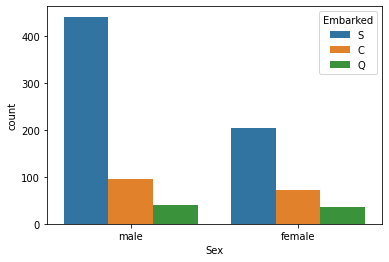

In [ ]:
sns.countplot(data=train, x='Sex', hue='Embarked')

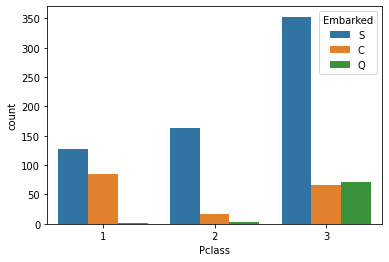

In [ ]:
sns.countplot(data=train, x='Pclass', hue='Embarked')

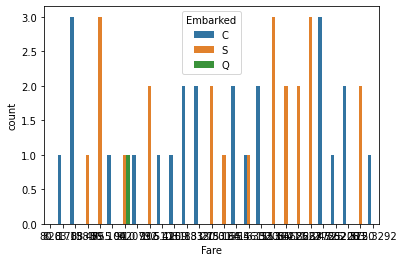

In [ ]:
sns.countplot(data=train[:][(train['Sex']=='female') & (train['Pclass']==1) & (train['Fare']>=80.0)], x='Fare', hue='Embarked')

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 3.2. Data Cleaning

3.2.1. Adding age values in missing rows

In [ ]:
def impute_age_pclass(cols):
  age = cols[0]
  pclass = cols[1]
  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 28
    elif pclass == 3:
      return 25
  return age

In [ ]:
def impute_age_sex_pclass(cols):
  age = cols[0]
  pclass = cols[1]
  male = cols[2]
  if pd.isnull(age):
    if pclass == 1:
      return 40 if male else 35
    elif pclass == 2:
      return 30 if male else 28
    elif pclass == 3:
      return 25 if male else 21
  return age

In [ ]:
train['Age'] = train[['Age', 'Pclass', 'male']].apply(impute_age_sex_pclass, axis=1)

3.2.2. Removal of unwanted, not useful columns

In [154]:
train.shape

(891, 13)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [155]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [156]:
train.shape

(891, 9)

3.2.3. Adding embarked values in missing rows

In [ ]:
def impute_embarked(cols):
  embarked = cols
  if pd.isnull(embarked):
    return 'S'
  return embarked

In [ ]:
train['Embarked'] = train['Embarked'].apply(impute_embarked)

In [160]:
# Total missing values in train dataframe
train.isna().sum().sum()

0

### 3.3. Transforming Categorical Data

Categorical columns: Whose values are divided into categories
*   Sex (two categories) (male, female)
*   Embarked (Three Categories) (Q, S, C)

Use Dummy Variable Trap: It is a technique to avoid extra column in case of categorical columns. When we are converting a categorical column of two values, we need to create two columns. However, this technique allows us to handle the issue with one less column. When all category values are zero, it means the value of the feature in that row is the missing COLUMN of that category.

In [ ]:
pd.get_dummies(train['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
pd.get_dummies(train['Sex'], drop_first = True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [ ]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
train = pd.concat([train, sex, embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


## 4. Building Model
### 4.1. Train Test Split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

### 4.2. Training and Predicting

In [163]:
from sklearn.linear_model import LogisticRegression

4.2.1. Training

In [164]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

4.2.2. Prediction

In [165]:
predict = logmodel.predict(X_test)

4.2.3. Calculate Accuracy

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
accuracy = confusion_matrix(Y_test, predict)
accuracy

array([[134,  20],
       [ 37,  77]])

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
accuracy = accuracy_score(Y_test, predict)
accuracy

0.7873134328358209

In [1]:
train.shape

NameError: ignored